In [15]:
import numpy as np
import scipy.optimize as sci
from scipy import constants
import pandas as pd
from scipy.integrate import quad
import scipy.optimize as optimization
import sigfig as sf

In [5]:
# For rounding up to significant digits correctly
from math import floor, log10

def fexp(f):
    return int(floor(log10(abs(f)))) if f != 0 else 0

def fman(f):
    return f/10**fexp(f)

In [6]:
import matplotlib.pyplot as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import seaborn as sns
plt.style.use(['science', 'notebook', 'grid'])
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    # # Use 9pt font in plots, to match 9pt caption fontsize in RevTeX
    # "axes.labelsize": 9,
    # "font.size": 9,
    # # Make the legend/label fonts a little smaller
    # "legend.fontsize": 8,
    # "figure.titlesize": 8,
    # "xtick.labelsize": 8,
    # "ytick.labelsize": 8,
    "lines.linewidth": 1,
    "xtick.major.width": 0.5,
    "xtick.minor.width": 0.5,
    "ytick.major.width": 0.5,
    "ytick.minor.width": 0.5,
    "axes.linewidth": 0.5
}
plt.rcParams.update(tex_fonts)

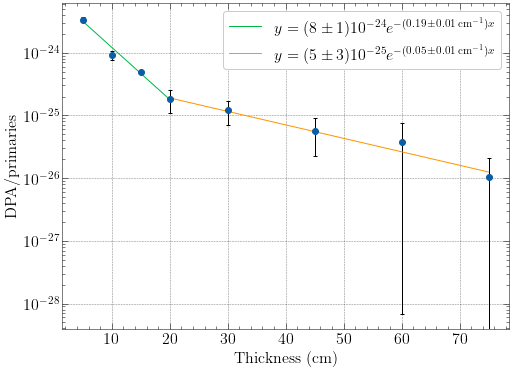

In [7]:
def f(t, C, μ): # Função a ser ajustada: Lei de LAMBERT-bEER
    return C*np.exp(-μ*t)

# Simulation data
t = [15, 30, 45, 60, 75, 0, 5, 10, 20]
dpa = [4.83891e-25, 1.20641e-25, 5.67515e-26, 3.71979e-26, 1.05042e-26, 2.60499e-22, 3.35645e-24, 9.221e-25, 1.82068e-25]
udpa = [0.0696352, 0.410312, 0.607292, 0.998167, 1, 0.00699652, 0.0860885, 0.172292, 0.395458]

# Uncertainty calculation
σdpa = np.multiply(dpa,udpa)

# Creating Data Frame from the input and calculated results
df = pd.DataFrame({'Thickness (cm)' : t,
                   'DPA'            : dpa,
                   'σDPA'           : σdpa,
                  })

# Reordering based on descending DPA value
df = df.sort_values(by='DPA', ascending=False, ignore_index=True)
#display(df)

# Selecting data interval
a = 1
b = len(df['Thickness (cm)'])

# Ploting Data
plt.errorbar(df['Thickness (cm)'][a:b], df['DPA'][a:b], # Data
             df['σDPA'][a:b],                           # Uncertainty on y values
             fmt='o',
             ecolor = 'black', 
             capsize = 2
            )

a = 1
b = len(df['Thickness (cm)'])
c = 4

xo = [1e-23,0.25] # Parâmetros Iniciais
fit1 = optimization.curve_fit(f, 
                             df['Thickness (cm)'][a:c+1], 
                             df['DPA'][a:c+1], 
                             p0=xo, 
                             sigma=df['σDPA'][a:c+1], 
                             absolute_sigma=True
                            )  
C = fit1[0][0]
μ = fit1[0][1]
stdevs = np.sqrt(np.diag(fit1[1]))
σC = stdevs[0]
σμ = stdevs[1]
uC = σC/C
uμ = σμ/μ

df_fit1 = pd.DataFrame({'C' : [C, σC, uC], 
                       'μ' : [μ,σμ, uμ]
                      }, 
                      index = ['Valor', 'Incerteza Absoluta', 'Incerteza Relativa']
                     )
#display(df_fit1)
x = np.linspace(df['Thickness (cm)'][a:c+1].min(),df['Thickness (cm)'][a:c+1].max(), 100)
plt.plot(x, f(x, C, μ), 
         label='$y = (%5.0f \pm %5.0f)  10^{%5.0f} e^{-(%5.2f \pm %5.2f \; \mathrm{cm}^{-1}) x}$' % tuple([fman(C), fman(σC),fexp(C), μ, σμ]), 
         )


xo = [1e-23,0.25] # Parâmetros Iniciais
fit2 = optimization.curve_fit(f, 
                             df['Thickness (cm)'][c:b], 
                             df['DPA'][c:b], 
                             p0=xo, 
                             sigma=df['σDPA'][c:b], 
                             absolute_sigma=True
                            )  
C = fit2[0][0]
μ = fit2[0][1]
stdevs = np.sqrt(np.diag(fit2[1]))
σC = stdevs[0]
σμ = stdevs[1]
uC = σC/C
uμ = σμ/μ

df_fit2 = pd.DataFrame({'C' : [C, σC, uC], 
                        'μ' : [μ,σμ, uμ]
                      }, 
                      index = ['Valor', 'Incerteza Absoluta', 'Incerteza Relativa']
                     )
#display(df_fit2)
x = np.linspace(df['Thickness (cm)'][c:b].min(),df['Thickness (cm)'][c:b].max(), 100)
plt.plot(x, f(x, C, μ), 
         label='$y = (%5.0f \pm %5.0f)  10^{%5.0f} e^{-(%5.2f \pm %5.2f \; \mathrm{cm}^{-1}) x}$' % tuple([fman(C), fman(σC),fexp(C), μ, σμ]), 
         )

plt.xlabel('Thickness (cm)')
plt.ylabel('DPA/primaries')
plt.yscale('log')
plt.legend()

In [35]:
def f(t, C, μ): # Função a ser ajustada: Lei de LAMBERT-bEER
    return C*np.exp(-μ*t)

par, cov = optimization.curve_fit(f, 
                                  df['Thickness (cm)'][a:c+1], 
                                  df['DPA'][a:c+1], 
                                  p0 = [1e-23, 0.25], 
                                  sigma = df['σDPA'][a:c+1], 
                                  absolute_sigma=True
                                 )  
var = np.diag(cov)

fit = pd.DataFrame({ 'Params': ['C', 'μ'], 'Values': par, 'Variance': var, 'StdDeviation': np.sqrt(var)})
display(fit)
#fit['Result'] = [0, 1]

TypeError: cannot do slice indexing on RangeIndex with these indexers [123 ± 4] of type str

In [30]:
a = sf.round(123,uncertainty=4)
a

'123 ± 4'